<a href="https://colab.research.google.com/github/inuwamobarak/document-clustering/blob/main/Documents%20Clustering%20with%20Python%20Using%20Wikipedia%20articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering documents with Python Using the Wikipedia Python package

Document Clustering analysis is the technique of organizing documents in an unsupervised manner. Document clustering may be employed for different tasks in business settings such as categorizing similar tweets, news updates, customer reviews, and comments, and grouping text files or documents into similar groups. It is possible to deal with the documents using the clustering technique when they are converted as vectors.

## STEP 1: Import Required Libraries

In [ ]:
# Importing needed libraries
# This libraries may not be directly used but it is required
import pandas as pd
import matplotlib.pyplot as plt

# For document preparation
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS

# For implementing clustering technique
from sklearn.cluster import KMeans

## STEP 2: Installing Wikipedia Library Python package

In [ ]:
# importing wikipedia library
!pip install wikipedia
import wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# testing the import with sample article "Analytics"
print(wikipedia.summary("Analytics"))

Analysis (PL: analyses) is the process of breaking a complex topic or substance into smaller parts in order to gain a better understanding of it. The technique has been applied in the study of mathematics and logic since before Aristotle (384–322 B.C.), though analysis as a formal concept is a relatively recent development.The word comes from the Ancient Greek ἀνάλυσις (analysis, "a breaking-up" or "an untying;" from ana- "up, throughout" and lysis "a loosening"). From it also comes the word's plural, analyses.
As a formal concept, the method has variously been ascribed to Alhazen, René Descartes (Discourse on the Method), and Galileo Galilei. It has also been ascribed to Isaac Newton, in the form of a practical method of physical discovery (which he did not name).
The converse of analysis is synthesis: putting the pieces back together again in a new or different whole. 




## STEP 3: Loading the Articles for Clustering

In [ ]:
# Article to be clustered
articles = ['Analytics', 'Lawsuit', 'Military', 'Economy', 'Health', 'Education', 'Food', 'Languages', 'Africa', 'Countries', 'Finance', 'Earth', 'Agriculture', 'Plants']

In [ ]:
# Loading contents

article_content = [] # For Article words
article_title = [] # For Article title

for article in articles:
    print("Loading Article: ", article) # Display the list of articles while searching through wikipedia pages
    article_content.append(wikipedia.page(article).content) # Get a WikipediaPage object for the page with title in list "article"
    article_title.append(article)

Loading Article:  Analytics
Loading Article:  Lawsuit
Loading Article:  Military
Loading Article:  Economy
Loading Article:  Health
Loading Article:  Education
Loading Article:  Food
Loading Article:  Languages
Loading Article:  Africa
Loading Article:  Countries
Loading Article:  Finance
Loading Article:  Earth
Loading Article:  Agriculture
Loading Article:  Plants


In [ ]:
# Iterating the wrticles title content
x = 1
for article in article_title:
  print(x, article)
  x = x + 1

1 Analytics
2 Lawsuit
3 Military
4 Economy
5 Health
6 Education
7 Food
8 Languages
9 Africa
10 Countries
11 Finance
12 Earth
13 Agriculture
14 Plants


In [ ]:
print(article_content[2]) # printing sample article at index [2]

A military, also known collectively as armed forces, is a heavily armed, highly organized force primarily intended for warfare. It is typically authorized and maintained by a sovereign state, with its members identifiable by their distinct military uniform. It may consist of one or more military branches such as an army, navy, air force, space force, marines, or coast guard. The main task of the military is usually defined as defence of the state and its interests against external armed threats.
In broad usage, the terms armed forces and military are often treated as synonymous, although in technical usage a distinction is sometimes made in which a country's armed forces may include both its military and other paramilitary forces. There are various forms of irregular military forces, not belonging to a recognized state; though they share many attributes with regular military forces, they are less often referred to as simply military.

A nation's military may function as a discrete soci

## STEP 4: Converting Articles to Vector type

In [ ]:
# Data Preparations setting STOP Words and Vectorizer

type(STOP_WORDS)

vectorizer = TfidfVectorizer(stop_words=list(STOP_WORDS)) # Build or fetch the effective stop words list

X = vectorizer.fit_transform(article_content) # Learn vocabulary and idf, return document-term matrix

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


 .

## STEP 5: Generating Clusters with the Elbow Method

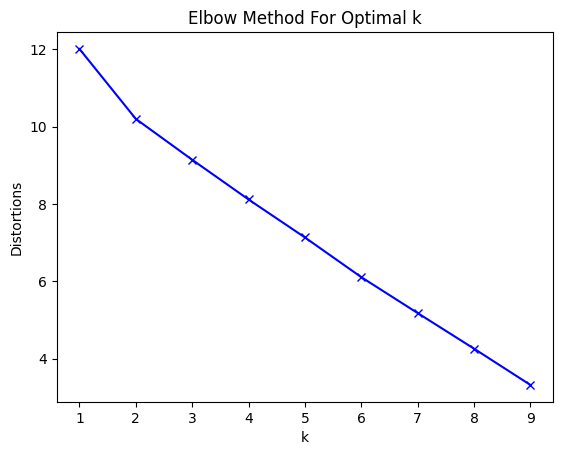

In [ ]:
distortions = []
inertias = []
K = range(1,10) # Setting a range for clusters
for k in K:
    # Building and fitting model
    kmeanModel = KMeans(n_clusters=k, max_iter=200, n_init=10)
    kmeanModel = kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

## STEP 6: Clustering Articles using K-Means

The max_iter represents the maximum iteration value. A maximum number of iterations of the k-means algorithm for a single run with a default value of 300 iterations but we adjust ours to 200 since our articles are not extremely large.

***Note***: When we do not explicitly set the number of clusters for K-Means, it uses a default value of 8 clusters.

In [ ]:
true_k = 3 # Value of K from elbow method

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10) # Clustering with K-Means with 3 clusters
model.fit(X) # Computes the k-means clustering
labels = model.labels_ # Labels of each point generated after fitting
wiki_cl = pd.DataFrame(list(zip(article_title,labels)), columns=['Article Title','cluster']) # Converting result to a table

print(wiki_cl.sort_values(by=['cluster']))

   Article Title  cluster
0      Analytics        0
1        Lawsuit        0
5      Education        0
6           Food        0
7      Languages        0
2       Military        1
3        Economy        1
8         Africa        1
9      Countries        1
10       Finance        1
12   Agriculture        1
13        Plants        1
4         Health        2
11         Earth        2


## STEP 7: Performing Evaluation

Cluster: 0
Title:
Analytics
  Lawsuit
Education
     Food
Languages


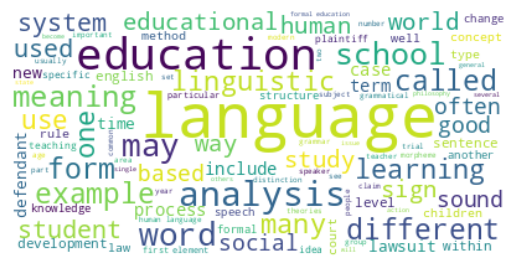

Cluster: 1
Title:
   Military
    Economy
     Africa
  Countries
    Finance
Agriculture
     Plants


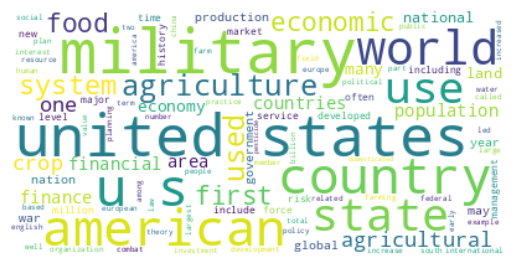

Cluster: 2
Title:
Health
 Earth


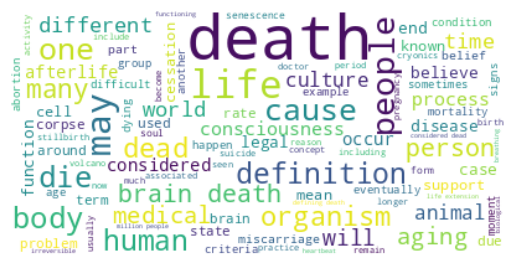

In [ ]:
from wordcloud import WordCloud # Importing WordCloud library

result={'cluster':labels,'wiki':article_content}
result=pd.DataFrame(result)

for k in range(0,true_k): # Iterating through the number of clusters
    s = result[result.cluster==k]
    # Getting  the words from the articles
    text = s['wiki'].str.cat(sep=' ')
    text = text.lower()
    text =' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    # Printing the labels
    print('Cluster: {}'.format(k))
    print('Title:')
    titles = wiki_cl[wiki_cl.cluster==k]['Article Title']
    print(titles.to_string(index=False))
    # Displaying the plots
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    # Saving Word Cloud to file
    if(imgtrack==0):
        wordcloud.to_file("one.png")
    elif(imgtrack==1):
        wordcloud.to_file("two.png")
    else:
        wordcloud.to_file("three.png")
    imgtrack = imgtrack+1;